# Q1. Theory and Concept

## 1. Explain the concept of batch normalization in the context of Artificial Neural Networksr

Ans: Batch normalization is a technique used in artificial neural networks to improve the stability and speed of training. It involves normalizing the input of each layer in a mini-batch of data, typically before the activation function, to reduce internal covariate shift. Here's a breakdown of the concept:

### Internal Covariate Shift:
During the training of neural networks, the distribution of inputs to each layer changes as the parameters of the preceding layers are updated. This phenomenon is known as internal covariate shift. It can make training slower and more unstable, as the network has to continuously adapt to the changing distributions.

### How Batch Normalization Works:
1. **Normalization**:
   - For each mini-batch of data during training, batch normalization standardizes the activations of each layer by subtracting the mini-batch mean and dividing by the mini-batch standard deviation.
   - This effectively centers the distribution of each feature around zero and normalizes its scale.

2. **Scaling and Shifting**:
   - After normalization, the activations are scaled by a learnable parameter (gamma) and shifted by another learnable parameter (beta).
   - This allows the network to learn the optimal scale and shift for each feature, providing flexibility in representation.

3. **Normalization at Inference**:
   - During inference (when making predictions), batch normalization uses the statistics (mean and standard deviation) collected during training to normalize the activations of each layer.
   - This ensures consistent behavior between training and inference.

### Drawbacks and Considerations:
1. **Increased Computational Cost**:
   - Batch normalization adds computational overhead due to the additional normalization and scaling operations performed at each layer.
   - However, this cost is often outweighed by the benefits in training efficiency and performance.

2. **Dependency on Batch Size**:
   - Batch normalization's effectiveness can be sensitive to the choice of batch size, and very small batch sizes may lead to unstable training.

## 2. Describe the benefits of using batch normalization during training

Ans: 
### Benefits of Batch Normalization:
1. **Stabilized Training**:
   - By normalizing the inputs to each layer, batch normalization reduces the internal covariate shift, leading to more stable and faster training.
   - This allows for the use of higher learning rates and accelerates convergence.

2. **Regularization**:
   - Batch normalization acts as a form of regularization, reducing the need for other regularization techniques such as dropout. This helps prevent overfitting and improves the generalization of the model.

3. **Gradient Flow**:
   - Batch normalization helps maintain a consistent gradient flow during backpropagation by keeping activations within a reasonable range.
   - This mitigates issues like vanishing or exploding gradients, especially in deep networks.

4. **Improved Performance**:
   - Batch normalization often leads to improved performance on a wide range of tasks, allowing neural networks to achieve better accuracy with fewer training iterations.


## 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Ans: The working principle of batch normalization involves two key steps: normalization and the introduction of learnable parameters. Here's how it works:

### 1. Normalization Step:
During training, for each mini-batch of data passed through the neural network, batch normalization standardizes the activations of each layer. This is achieved through the following normalization process:

1. **Compute Batch Statistics**:
   - For each feature (or channel) in the input to a layer, calculate the mean and standard deviation across the mini-batch.
   - Let \( \mu \) represent the mean and \( \sigma \) represent the standard deviation for each feature.

2. **Normalize Activations**:
   - Subtract the mean \( \mu \) and divide by the standard deviation \( \sigma \) for each feature.
   - This centers the distribution of each feature around zero and normalizes its scale, ensuring that the activations are roughly in the same range.

3. **Scaling and Shifting**:
   - After normalization, the activations are scaled by a learnable parameter (gamma) and shifted by another learnable parameter (beta).
   - This scaling and shifting operation provides the network with flexibility to learn the optimal scale and shift for each feature, allowing it to adapt to different distributions of inputs.

### 2. Learnable Parameters:
Batch normalization introduces two learnable parameters per feature per layer: gamma (γ) and beta (β). These parameters are learned during training through backpropagation and gradient descent. Here's how they work:

1. **Gamma (γ)**:
   - Gamma controls the scale of the normalized activations. It allows the network to learn whether to amplify or diminish the normalized values for each feature.
   - If gamma is close to 1, it means the feature's scale remains relatively unchanged. If gamma is greater than 1, it amplifies the scale, and if it's less than 1, it diminishes the scale.

2. **Beta (β)**:
   - Beta controls the shift of the normalized activations. It allows the network to learn an offset for each feature.
   - If beta is zero, the normalized activations remain centered around zero. If beta is non-zero, it shifts the normalized activations accordingly.

### Training and Inference:
During training, batch normalization calculates batch statistics (mean and standard deviation) using each mini-batch of data. During inference (when making predictions), it uses the population statistics (mean and standard deviation) computed during training to normalize the activations.

### Benefits:
- **Stabilized Training**: Batch normalization reduces internal covariate shift, leading to more stable and faster training.
- **Regularization**: It acts as a form of regularization, reducing overfitting and improving generalization.
- **Gradient Flow**: Batch normalization helps maintain a consistent gradient flow during backpropagation.

# Q2. Impementation

## 1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it


In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 49.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.2 MB/s

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the dataset

# Reshape and normalize the input images
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("MNIST dataset preprocessing complete.")
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
MNIST dataset preprocessing complete.
Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing images shape: (10000, 28, 28, 1)
Testing labels shape: (10000, 10)


## 2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorflow, pyTorch)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',    # Adam optimizer
              loss='categorical_crossentropy',  # Categorical cross-entropy loss function
              metrics=['accuracy'])  # Metric to monitor during training

# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the neural network on the chosen dataset without using batch normalization

In [13]:
# Train the model
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Accuracy:", test_accuracy)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8762 - loss: 0.4309 - val_accuracy: 0.9630 - val_loss: 0.1191
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9677 - loss: 0.1062 - val_accuracy: 0.9687 - val_loss: 0.1008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9711 - val_loss: 0.0925
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9832 - loss: 0.0516 - val_accuracy: 0.9748 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0383 - val_accuracy: 0.9769 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9779 - val_loss: 0.0743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9782 - val_loss: 0.0854
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0220 - 

## 4.Implement batch normalization layers in the neural network and train the model again

In [14]:
from tensorflow.keras.layers import BatchNormalization

# Define the model with batch normalization
model_with_bn = Sequential([
    Flatten(input_shape=(28, 28, 1)), 
    Dense(128, activation='relu'), 
    BatchNormalization(),  # Add Batch Normalization layer
    Dense(64, activation='relu'), 
    BatchNormalization(),  # Add Batch Normalization layer
    Dense(10, activation='softmax')
])

# Compile the model
model_with_bn.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Print the model summary
model_with_bn.summary()

# Train the model
history_bn = model_with_bn.fit(x_train, y_train, 
                               epochs=10, 
                               batch_size=32, 
                               validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss_bn, test_accuracy_bn = model_with_bn.evaluate(x_test, y_test)

print("Test Accuracy (with Batch Normalization):", test_accuracy_bn)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8774 - loss: 0.4094 - val_accuracy: 0.9576 - val_loss: 0.1390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9606 - loss: 0.1262 - val_accuracy: 0.9695 - val_loss: 0.0978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9728 - loss: 0.0890 - val_accuracy: 0.9718 - val_loss: 0.0924
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9752 - loss: 0.0769 - val_accuracy: 0.9745 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0647 - val_accuracy: 0.9744 - val_loss: 0.0799
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9805 - loss: 0.0591 - val_accuracy: 0.9778 - val_loss: 0.0720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0478 - val_accuracy: 0.9736 - val_loss: 0.0855
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0412 - 

## 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalizationr

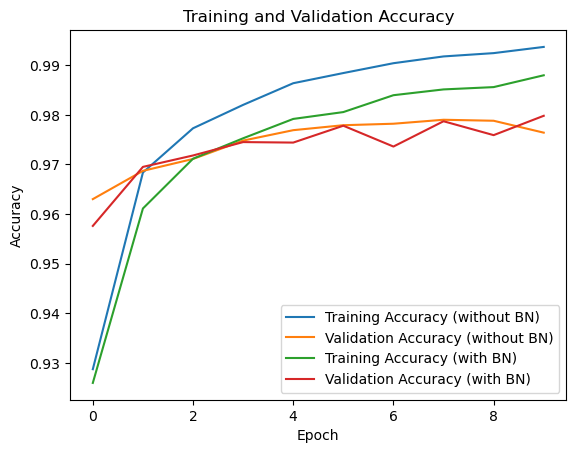

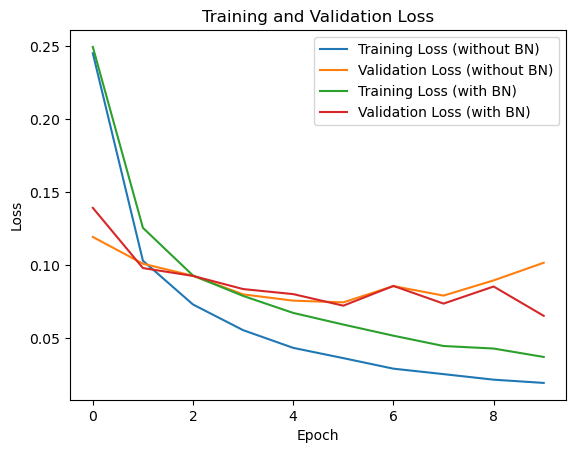

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy (without BN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (without BN)')
plt.plot(history_bn.history['accuracy'], label='Training Accuracy (with BN)')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy (with BN)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss (without BN)')
plt.plot(history.history['val_loss'], label='Validation Loss (without BN)')
plt.plot(history_bn.history['loss'], label='Training Loss (with BN)')
plt.plot(history_bn.history['val_loss'], label='Validation Loss (with BN)')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

Batch normalization (BN) has several impacts on the training process and the performance of neural networks:

1. **Improved Convergence Speed**: Batch normalization helps in stabilizing and speeding up the training process by reducing internal covariate shift. It normalizes the activations of each layer, ensuring that the mean and variance of the inputs to each layer remain consistent over time. This stability often leads to faster convergence during training, allowing the network to reach higher accuracies in fewer epochs.

2. **Reduced Dependency on Initialization**: With batch normalization, the network becomes less sensitive to weight initialization choices. This is because BN ensures that activations are centered around zero and have a standard deviation close to one, making it less likely for neurons to saturate or become inactive during training.

3. **Regularization Effect**: Batch normalization acts as a form of regularization by adding noise to the activations. During training, it introduces noise through mini-batch statistics, which helps prevent overfitting and improves generalization performance. As a result, batch normalization can sometimes mitigate the need for other forms of regularization techniques like dropout.

4. **Mitigation of Vanishing/Exploding Gradients**: Batch normalization can help alleviate the problem of vanishing or exploding gradients, especially in deep networks. By normalizing the activations, it keeps them within a manageable range, preventing extreme values that could lead to gradient saturation or explosion.

5. **Reduction in Internal Covariate Shift**: Internal covariate shift refers to the phenomenon where the distribution of layer inputs changes during training, slowing down the learning process. Batch normalization reduces this shift by normalizing the inputs to each layer, making the optimization process more stable and efficient.

6. **Reduced Sensitivity to Learning Rate**: Batch normalization makes neural networks less sensitive to the choice of learning rate. This is because it normalizes the activations, preventing large changes in their distribution, which in turn reduces the likelihood of the learning rate needing to be adjusted frequently during training.

Overall, batch normalization has a significant positive impact on the training process and the performance of neural networks. It helps in faster convergence, better generalization, and more stable optimization, ultimately leading to improved model performance on both training and validation datasets. However, it's worth noting that batch normalization also introduces additional parameters to the model, which may increase computational overhead and memory usage.